# Comparison of Written Text in Inferno, Purgatorio, Paradisio, and Good Omens

## In this project, I will be...

1. Comparing word frequencies between two works of a single author, Dante Alighieri.
2. Comparing word frequencies between works of two authors, Dante Alighieri and Terry Prachett & Neil Gaiman.
3. Finding if some words are preferred by one author but used less frequently by another author.b

### Part 1

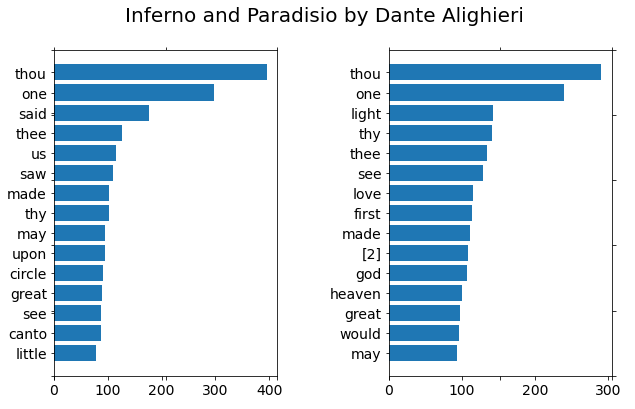

In [44]:
# Using Mockus' Source Code 

import operator
import requests, re, nltk
from nltk import clean_html
from bs4 import BeautifulSoup
from collections import Counter

# Removes stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', '[1]', '[2]', u'\u2014' ]

# Removes html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# Removes special characters
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# Defines a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    # Remove some stop words noticed
    wf.pop('[pg', None)
    wf.pop('gutenberg-tm', None)
    wf.pop('', None)
    wf.pop('project', None)
    
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Inferno
(wf_inferno, tw_inferno) = get_wf('https://gutenberg.org/files/1995/1995-h/1995-h.htm')

# Paradisio
(wf_purgatorio, tw_purgatorio) = get_wf('https://gutenberg.org/files/1996/1996-h/1996-h.htm') 

# Repeat drawing graph function from example above
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_1, wf_2, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_1)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_1 ])
    ax1 .barh (range(len(wf_1)), [ x [1] for x in wf_1 ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_2)) 
    pylab .yticks (pos, [ x [0] for x in wf_2 ])
    ax2 .barh (range (len(wf_2)), [ x [1] for x in wf_2 ], align='center')

plotTwoLists (wf_inferno, wf_paradisio, 'Inferno and Paradisio by Dante Alighieri')

### Part 2

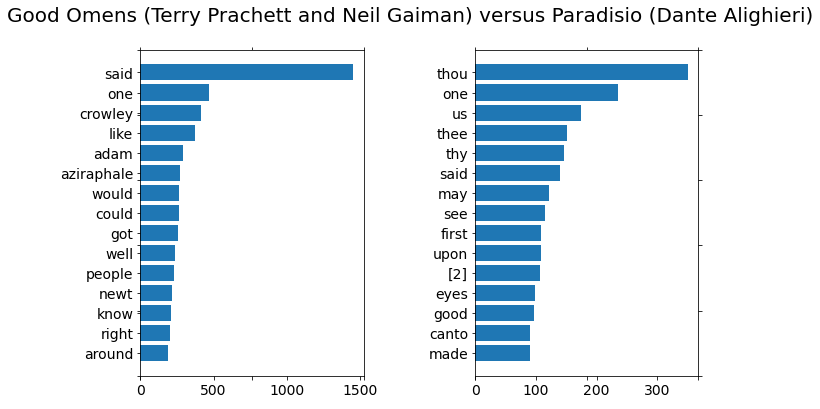

In [45]:
# Using Mockus' Source Code 

import operator
import requests, re, nltk
from nltk import clean_html
from bs4 import BeautifulSoup
from collections import Counter

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', '[1]', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    # Remove some stop words noticed
    wf.pop('[pg', None)
    wf.pop('gutenberg-tm', None)
    wf.pop('', None)
    wf.pop('project', None)
    
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)


# Good Omens
(wf_goodOmens, tw_goodOmens) = get_wf('https://github.com/pixelatinate/MiniProject1/blob/master/GoodOmens.txt')

# Purgatorio
(wf_purgatorio, tw_purgatorio) = get_wf('https://gutenberg.org/files/1996/1996-h/1996-h.htm') 

# Repeat drawing graph function from example above
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_1, wf_2, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_1)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_1 ])
    ax1 .barh (range(len(wf_1)), [ x [1] for x in wf_1 ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_2)) 
    pylab .yticks (pos, [ x [0] for x in wf_2 ])
    ax2 .barh (range (len(wf_2)), [ x [1] for x in wf_2 ], align='center')

plotTwoLists (wf_goodOmens, wf_purgatorio, 'Good Omens (Terry Prachett and Neil Gaiman) versus Paradisio (Dante Alighieri)')

In [46]:
# Converted to dictionaries
dict_Alighieri = {}
dict_PrachettGaiman = {}

for word, freq in wf_purgatorio:
    dict_Alighieri[word] = freq

for word, freq in wf_goodOmens:
    dict_PrachettGaiman[word] = freq
    
# Used "one" because both authors did
print(f'{round(dict_Alighieri["one"] / tw_purgatorio * 100, 2)}%: Frequency of the word "one" for Dante Alighieri as a percent')
print(f'{round(dict_PrachettGaiman["one"] / tw_goodOmens * 100, 2)}%: Frequency of the word "one" for Prachett and Gaimain as a percent')

0.87%: Frequency of the word "one" for Dante Alighieri as a percent
0.81%: Frequency of the word "one" for Prachett and Gaimain as a percent
